In [ ]:
import requests
import pandas as pd

The requests allows you to call APIs  and get data from the web in json format, then pandas helps clean ,analyze and arrange in a tabular format(DataFrame)

In [ ]:
url= "https://disease.sh/v3/covid-19/historical/ghana?lastdays=all"
response = requests.get(url)
if response.status_code == 200:
    data = response.json()
else:
  print("Failed to fetch data, response.status_code")

I used requests.get() to fetch the data online using the url ,status_code ==200 to check if the data has been safely fetched then it's further stored in the data variable, remember the status code has to be confirmed to avoid crashing your project, other status code could be 404,401,500, this fetches dat on Ghana

In [ ]:
print(data.keys())
type(data['timeline'])
timeline = data['timeline']
print(timeline.keys())

dict_keys(['country', 'province', 'timeline'])
dict_keys(['cases', 'deaths', 'recovered'])


Now that we have our data , I decided to view the keys in the file, not forgetten json is mostly stored as a dictionary and uses key-value pair,I needed the timeline data so i checked it type and realized it was a dict ,meaning it can be further explored.

In [ ]:
cases = pd.DataFrame(list(timeline['cases'].items()), columns=['Date', 'Cases'])
deaths = pd.DataFrame(list(timeline['deaths'].items()), columns=['Date', 'Deaths'])
recovered = pd.DataFrame(list(timeline['recovered'].items()), columns=['Date', 'Recovered'])
country = pd.DataFrame({'country': [data['country']]})
df = pd.merge(deaths, cases,  on='Date')
df = df.merge(recovered, on='Date')
df.tail(10)

,Date,Deaths,Cases,Recovered
1133,2/28/23,1462,171172,0
1134,3/1/23,1462,171172,0
1135,3/2/23,1462,171172,0
1136,3/3/23,1462,171172,0
1137,3/4/23,1462,171172,0
1138,3/5/23,1462,171209,0
1139,3/6/23,1462,171209,0
1140,3/7/23,1462,171229,0
1141,3/8/23,1462,171229,0
1142,3/9/23,1462,171229,0


pd.Dataframe(..)is how we create table-like structures in pandas,so we pass it as a dict and .items() converts the dicts to tuples in a row format,pandas doesn't know  what the column names of a tuple should be so we define it ,that's why we introduced columns ,without the columns pandas will just name it 0 and 1. pd.merge is used to join the individual tables together ,the on date is sort of like a foreign key so with this one merge every table that has the same date as a column

In [ ]:
url_nigeria= "https://disease.sh/v3/covid-19/historical/nigeria?lastdays=all"
response_nigeria = requests.get(url_nigeria)
if response_nigeria.status_code == 200:
    data_nigeria = response_nigeria.json()
else:
  print("Failed to fetch data, response.status_code")

I did the same for Nigeria

In [ ]:
print(data_nigeria.keys())
type(data_nigeria['timeline'])
timeline = data_nigeria['timeline']
print(timeline.keys())

dict_keys(['country', 'province', 'timeline'])
dict_keys(['cases', 'deaths', 'recovered'])


In [ ]:
cases = pd.DataFrame(list(timeline['cases'].items()), columns=['Date', 'Cases'])
deaths = pd.DataFrame(list(timeline['deaths'].items()), columns=['Date', 'Deaths'])
recovered = pd.DataFrame(list(timeline['recovered'].items()), columns=['Date', 'Recovered'])
country = pd.DataFrame({'country': [data_nigeria['country']]})
df_nigeria = pd.merge(deaths, cases,  on='Date')
df_nigeria = df_nigeria.merge(recovered, on='Date')
df_nigeria.tail(10)

,Date,Deaths,Cases,Recovered
1133,2/28/23,3155,266593,0
1134,3/1/23,3155,266598,0
1135,3/2/23,3155,266598,0
1136,3/3/23,3155,266598,0
1137,3/4/23,3155,266598,0
1138,3/5/23,3155,266598,0
1139,3/6/23,3155,266598,0
1140,3/7/23,3155,266598,0
1141,3/8/23,3155,266598,0
1142,3/9/23,3155,266598,0


In [ ]:
df_nigeria['country']= data_nigeria['country']
df_nigeria['country'].value_counts()

,count
country,
Nigeria,1143


In [ ]:
df_nigeria['country'] = 'Nigeria'
df['country'] = 'Ghana'


I added this because country wasn't showing when I concated both tables

In [ ]:
# Combine rows
df_combined = pd.concat([df, df_nigeria], ignore_index=True)

# Check first few rows
print(df_combined.tail())


        Date  Deaths   Cases  Recovered  country
2281  3/5/23    3155  266598          0  Nigeria
2282  3/6/23    3155  266598          0  Nigeria
2283  3/7/23    3155  266598          0  Nigeria
2284  3/8/23    3155  266598          0  Nigeria
2285  3/9/23    3155  266598          0  Nigeria


In [ ]:
import matplotlib.pyplot as plt
df['Date'] = pd.to_datetime(df['Date'])
df_nigeria['Date'] = pd.to_datetime(df_nigeria['Date'])


/tmp/ipython-input-1225326864.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])
/tmp/ipython-input-1225326864.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_nigeria['Date'] = pd.to_datetime(df_nigeria['Date'])


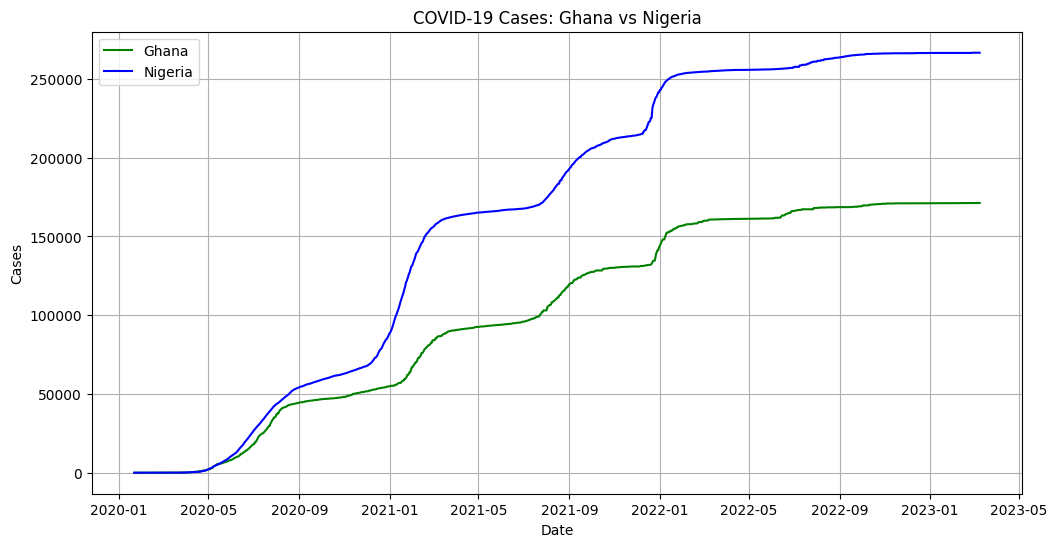

In [ ]:
plt.figure(figsize=(12,6))

# Ghana
data = df[df['country'] == 'Ghana']
plt.plot(data['Date'], data['Cases'], label='Ghana', color='green')

# Nigeria
data_nigeria = df_nigeria[df_nigeria['country'] == 'Nigeria']
plt.plot(data_nigeria['Date'], data_nigeria['Cases'], label='Nigeria', color='blue')

# Labels
plt.title('COVID-19 Cases: Ghana vs Nigeria')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend()
plt.grid(True)
plt.show()

Visual view of my data


In [ ]:
from sqlalchemy import create_engine

df = pd.DataFrame(data)
df_nigeria = pd.DataFrame(data_nigeria)

# SQLite engine (file will be stored in Colab)
conn = create_engine("sqlite:///mydata.db")

# Save dataframe to SQL
df.to_sql("covid_data", conn, if_exists="replace", index=False)
df_nigeria.to_sql("covid_data", conn, if_exists="append", index=False)


print("Print COVID-19 data stored in SQLite")

# checking if it works
df_check = pd.read_sql("SELECT * FROM covid_data LIMIT 5", conn)
print(df_check)


Print COVID-19 data stored in SQLite
                         Date  Deaths  Cases  Recovered country
0  2020-01-22 00:00:00.000000       0      0          0   Ghana
1  2020-01-23 00:00:00.000000       0      0          0   Ghana
2  2020-01-24 00:00:00.000000       0      0          0   Ghana
3  2020-01-25 00:00:00.000000       0      0          0   Ghana
4  2020-01-26 00:00:00.000000       0      0          0   Ghana


In [ ]:
query = "SELECT count(deaths) AS total_deaths, count(cases) AS total_cases FROM covid_data group by country"
count = pd.read_sql(query, conn)
print(count)

   total_deaths  total_cases
0          1143         1143
1          1143         1143


In [ ]:
query = "select c.date,c.cases, c.country from covid_data c where c.date =  (select date from covid_data  where country = c.country order by cases desc, date asc limit 1)"
results = pd.read_sql(query, conn)
print(results)

                         Date   Cases  country
0  2023-03-07 00:00:00.000000  171229    Ghana
1  2023-03-01 00:00:00.000000  266598  Nigeria


Comparing Peak Cases Dates

In [ ]:
query = "select c.date,c.deaths, c.country from covid_data c where c.date =  (select date from covid_data  where country = c.country order by deaths desc, date asc limit 1)"
results = pd.read_sql(query, conn)
print(results)

                         Date  Deaths  country
0  2023-01-13 00:00:00.000000    1462    Ghana
1  2022-09-13 00:00:00.000000    3155  Nigeria


Finding the highest death per country

In [ ]:
query = "select * from covid_data limit 1 offset 100"
results = pd.read_sql(query, conn)
print(results)

                         Date  Deaths  Cases  Recovered country
0  2020-05-01 00:00:00.000000      17   2074        212   Ghana


Queried a particular row to see what was recorded

In [ ]:
query = "select * from covid_data where country = 'Nigeria' limit 1 offset 100"
results = pd.read_sql(query, conn)
print(results)

                         Date  Deaths  Cases  Recovered  country
0  2020-05-01 00:00:00.000000      68   2170        351  Nigeria


Did same for Nigeria

In [ ]:
query = "select * from covid_data where date ='2020-09-21 00:00:00.000000'"
results = pd.read_sql(query, conn)
print(results)

                         Date  Deaths  Cases  Recovered  country
0  2020-09-21 00:00:00.000000     297  46062      45258    Ghana
1  2020-09-21 00:00:00.000000    1100  57437      48674  Nigeria


Used a specific date to fetch data

In [ ]:
query = "select country, sum(cases) as Total_Cases, sum(deaths) as Total_Deaths, sum(recovered) as Total_Recovered from covid_data group by country "
results = pd.read_sql(query, conn)
print(results)

   country  Total_Cases  Total_Deaths  Total_Recovered
0    Ghana    117781853        994429         25893775
1  Nigeria    188300124       2402121         39492087


Total cases, deaths and recoveries per country

In [ ]:
query = "select country, avg(cases) as Average_Cases, avg(deaths) as Average_Deaths, avg(recovered) as Average_Recovered from covid_data group by country "
results = pd.read_sql(query, conn)
print(results)

   country  Average_Cases  Average_Deaths  Average_Recovered
0    Ghana  103046.240595      870.016623       22654.221347
1  Nigeria  164742.015748     2101.593176       34551.257218


Average cases ,deaths and recoveries reported per country

In [ ]:
query = "select country, min(cases) as Minimum_Cases, min(deaths) as Minimum_Deaths, min(recovered) as Minimum_Recovered from covid_data group by country "
results = pd.read_sql(query, conn)
print(results)

   country  Minimum_Cases  Minimum_Deaths  Minimum_Recovered
0    Ghana              0               0                  0
1  Nigeria              0               0                  0


First recorded cases,death and recoveries

In [ ]:
query = "select country, max(cases) as Maximum_Cases, max(deaths) as Maximum_Deaths, max(recovered) as Maximum_Recovered from covid_data group by country "
results = pd.read_sql(query, conn)
print(results)

   country  Maximum_Cases  Maximum_Deaths  Maximum_Recovered
0    Ghana         171229            1462              98633
1  Nigeria         266598            3155             165208


Peak records for cases ,deaths and recoveries per country


In [ ]:
query = "select country, sum(cases) as Total_Cases, sum(deaths) as Total_Deaths, sum(recovered) as Total_Recovered, min(date) as first_case_date ,max(date) as last_case_date, max(cases) as peak_daily_cases, avg(cases) as avg_daily_cases from covid_data group by country "
results = pd.read_sql(query, conn)
print(results)

   country  Total_Cases  Total_Deaths  Total_Recovered  \
0    Ghana    117781853        994429         25893775   
1  Nigeria    188300124       2402121         39492087   

              first_case_date              last_case_date  peak_daily_cases  \
0  2020-01-22 00:00:00.000000  2023-03-09 00:00:00.000000            171229   
1  2020-01-22 00:00:00.000000  2023-03-09 00:00:00.000000            266598   

   avg_daily_cases  
0    103046.240595  
1    164742.015748  


Summary per country